In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import networkx as nx
import random
import os
import sys
import subprocess
import re
#import pylab as plt


In [2]:
def writeGraph(grafo,file_output):
    with open(file_output, 'w') as f:
        f.write(str(len(grafo))+'\n')
        f.write(str(grafo.number_of_edges())+'\n')
        for eje in list(grafo.edges):
            f.write(str(eje[0]+1)+' '+str(eje[1]+1)+'\n')



In [3]:
def readGraph(file_input):
    grafo = {}
    ejes = []
    with open(file_input, 'r') as f:
        grafo["nodos"] = int(f.readline())
        grafo["aristas"]=int(f.readline())
        for e in f:
            ejes.append((int(e.split(' ')[0]),int(e.split(' ')[1])))
        grafo["ejes"] = ejes
    return grafo        

In [4]:
def readRanking(file_input):
    ranking = []
    p = 0.0
    with open(file_input,'r') as f:
        p = float(f.readline())
        for r in f:
            ranking.append(float(r))
    return ranking

In [87]:
ranking = readRanking("cualitativos/salida/test_aislados.txt.0.6.out")
par = zip(range(1,len(ranking)+1),ranking)
par = list(par)
par.sort(key = lambda x: x[1], reverse = True)
par

[(5, 0.174397),
 (1, 0.133779),
 (4, 0.125348),
 (3, 0.108696),
 (6, 0.0870474),
 (8, 0.0870474),
 (2, 0.083612),
 (7, 0.0696379),
 (9, 0.0434783),
 (10, 0.0434783),
 (11, 0.0434783)]

In [12]:
nodos = range(1,11)
data = [(1,2),(2,1),(2,3),(3,2),(3,4),(4,3),(4,5),(5,4),(5,6),(6,5),(6,7),(7,6),(7,8),(8,7),(8,1),(1,8),(1,10),(2,10),
       (3,10),(4,10),(5,10),(6,10),(7,10),(8,10),(10,9)]
G = nx.DiGraph()
G.add_nodes_from(nodos)
G.add_edges_from(data)
G.edges()

OutEdgeView([(1, 2), (1, 8), (1, 10), (2, 1), (2, 3), (2, 10), (3, 2), (3, 4), (3, 10), (4, 3), (4, 5), (4, 10), (5, 4), (5, 6), (5, 10), (6, 5), (6, 7), (6, 10), (7, 6), (7, 8), (7, 10), (8, 7), (8, 1), (8, 10), (10, 9)])

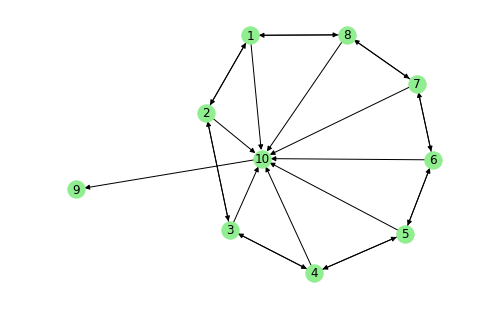

In [23]:
nx.draw(G, with_labels=True,node_color ='lightgreen')
plt.savefig("prueba_circular"+ ".png", transparent = True)
plt.draw()

In [32]:
grafo2_dict = readGraph("cualitativos/test_2.txt")
nodos = range(1,grafo2_dict["nodos"]+1)
list(nodos)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [44]:
grafo2_dict = readGraph("cualitativos/test_1.txt")
nodos = range(1,grafo2_dict["nodos"]+1)
data = grafo2_dict["ejes"]
grafo_2 = nx.DiGraph()
grafo_2.add_nodes_from(nodos)
grafo_2.add_edges_from(data)
grafo_2.edges()


OutEdgeView([(1, 2), (2, 1), (3, 1), (4, 1), (4, 3), (5, 1), (5, 3), (6, 1), (6, 3), (7, 1), (7, 3), (8, 1), (8, 3)])

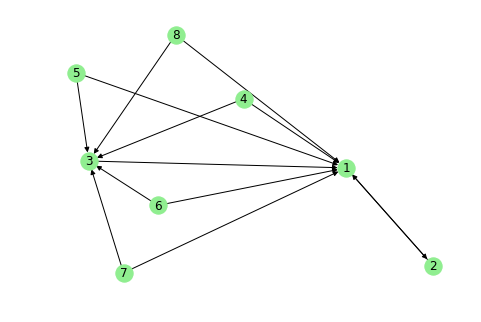

In [58]:
nx.draw(grafo_2, layout = nx.circular_layout(grafo_2), with_labels=True,node_color ='lightgreen')
plt.savefig("prueba_grafo_2"+ ".png", transparent = True)
plt.draw()

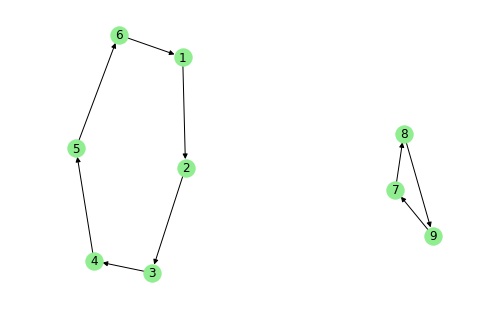

In [50]:
grafo_dict_3 = readGraph("cualitativos/test_3.txt")
nodos = range(1,grafo_dict_3["nodos"]+1)
list(nodos)
grafo_dict_3 = readGraph("cualitativos/test_3.txt")
nodos = range(1,grafo_dict_3["nodos"]+1)
data = grafo_dict_3["ejes"]
grafo_3 = nx.DiGraph()
grafo_3.add_nodes_from(nodos)
grafo_3.add_edges_from(data)
grafo_3.edges()
nx.draw(grafo_3, layout = nx.circular_layout(grafo_3), with_labels=True,node_color ='lightgreen')
plt.savefig("prueba_3_no_conexa"+ ".png", transparent = True)
plt.show()


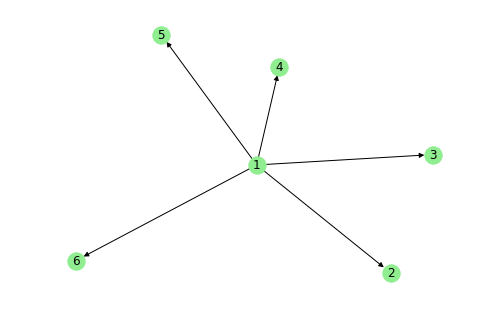

In [60]:
grafo_dict_estrella = readGraph("cualitativos/test_star.txt")
nodos = range(1,grafo_dict_estrella["nodos"]+1)
data = grafo_dict_estrella["ejes"]
grafo_estrella = nx.DiGraph()
grafo_estrella.add_nodes_from(nodos)
grafo_estrella.add_edges_from(data)
grafo_estrella.edges()
nx.draw(grafo_estrella, layout = nx.circular_layout(grafo_estrella), with_labels=True,node_color ='lightgreen')
plt.savefig("prueba_estrella"+ ".png", transparent = True)
plt.show()

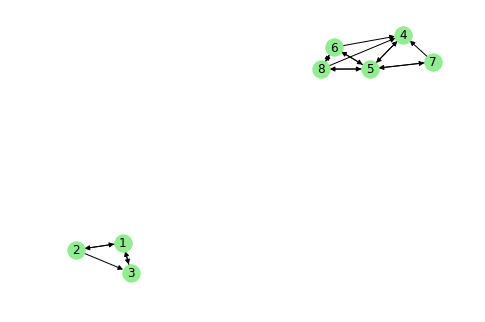

In [23]:
grafo_dict_aislados = readGraph("cualitativos/test_aislados.txt")
nodos = range(1,grafo_dict_aislados["nodos"]+1)
data = grafo_dict_aislados["ejes"]
grafo_dict_aislados = nx.DiGraph()
grafo_dict_aislados.add_nodes_from(nodos)
grafo_dict_aislados.add_edges_from(data)
#pos=nx.graphviz_layout(G)
grafo_dict_aislados.edges()
nx.draw(grafo_dict_aislados,nodelist = [x for x in range(1,9)], pos = nx.spring_layout(grafo_dict_aislados, k=0.3*1/np.sqrt(len(grafo_dict_aislados.nodes())), iterations=20), with_labels=True,node_color ='lightgreen')
#nx.draw_networkx_nodes(grafo_dict_aislados, pos = nx.spring_layout(grafo_dict_aislados, k=0.01*1/np.sqrt(len(grafo_dict_aislados.nodes()))), nodelist= [9,10,11], with_labels=True,node_color ='lightgreen')
#plt.savefig("prueba_aislado"+ ".png", transparent = True)
#plt.figure(3, figsize=(180, 180))
plt.draw()

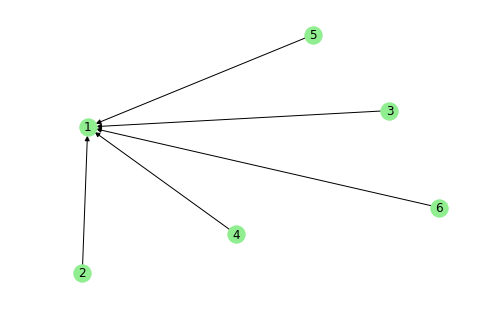

In [12]:
grafo_dict_estrella = readGraph("cualitativos/test_estrella.txt")
nodos = range(1,grafo_dict_estrella["nodos"]+1)
data = grafo_dict_estrella["ejes"]
grafo_estrella = nx.DiGraph()
grafo_estrella.add_nodes_from(nodos)
grafo_estrella.add_edges_from(data)
grafo_estrella.edges()
nx.draw(grafo_estrella, layout = nx.circular_layout(grafo_estrella), with_labels=True,node_color ='lightgreen')
#plt.savefig("prueba_estrella"+ ".png", transparent = True)
plt.show()

## Correr los test

In [11]:
ejecutable = "../src/tp1"
ps = [0.3, 0.6, 0.8, 0.85, 0.9]
pruebas = ["cualitativos/test_1.txt", "cualitativos/test_2.txt", "cualitativos/test_3.txt", "cualitativos/test_aislados.txt",
          "cualitativos/test_star.txt", "cualitativos/test_estrella.txt", "cualitativos/test_estrella+1.txt",
           "cualitativos/test_estrella+2.txt", "cualitativos/test_estrella+3.txt", 
           "cualitativos/test_estrella+4.txt", "cualitativos/test_estrella+5.txt"]

In [12]:
for prueba in pruebas:
    for p in ps:
        proceso = subprocess.Popen([ejecutable,prueba, str(p),'-t','-e',"cualitativos/salida/", '-o',
                                    os.path.basename(prueba)+"."+str(p)+".out"],stdout=subprocess.PIPE)
        [output, error] = proceso.communicate()

In [14]:
directory = os.fsencode("cualitativos/salida/")

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    print (filename)
    if filename.endswith(".out"): 
        ranking = readRanking("cualitativos/salida/"+filename)
        par = zip(range(1,len(ranking)+1),ranking)
        par = list(par)
        par.sort(key = lambda x: x[1], reverse = True)
        with open("cualitativos/salida/ordenado/"+filename+".ordered", 'w') as f:                
            for p in par:
                f.write(str(p[0])+' '+str(p[1])+"\n")


test_estrella.txt.0.8.out
test_estrella+2.txt.0.6.out
test_estrella+2.txt.0.8.out
test_estrella+5.txt.0.9.out
ordenado
test_estrella+1.txt.0.8.out
test_2.txt.0.6.out
test_estrella+3.txt.0.6.out
test_estrella+3.txt.0.8.out
test_estrella+2.txt.0.9.out
test_estrella+4.txt.0.9.out
test_2.txt.0.3.out
test_estrella+1.txt.0.6.out
test_estrella+3.txt.0.9.out
pepe0.9.out
test_2.txt.0.8.out
test_3.txt.0.6.out
test_aislados.txt.0.3.out
test_3.txt.0.8.out
test_1.txt.0.9.out
test_aislados.txt.0.6.out
test_estrella+1.txt.0.85.out
test_star.txt.0.6.out
test_1.txt.0.8.out
test_2.txt.0.9.out
test_estrella+2.txt.0.85.out
test_1.txt.0.6.out
test_estrella+2.txt.0.3.out
test_aislados.txt.0.8.out
test_aislados.txt.0.9.out
test_1.txt.0.3.out
test_estrella.txt.0.9.out
test_star.txt.0.8.out
test_estrella+4.txt.0.6.out
test_3.txt.0.9.out
test_estrella.txt.0.6.out
test_2.txt.0.85.out
test_estrella+5.txt.0.3.out
test_estrella+3.txt.0.85.out
test_estrella+3.txt.0.3.out
test_star.txt.0.85.out
test_estrella.txt.0.3.